In [76]:
import pandas as pd
import matplotlib.pyplot as plt
#displaly just below. will avoid plt.show()
%matplotlib inline

In [77]:
birthdata = pd.read_csv('E:\Amila\Amila\Predictive Analytics\L&D\Births2015.csv',index_col = [0] , parse_dates = [0])

In [78]:
birthdata.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [79]:
#give stat of dataset
birthdata.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


ARIMA - Autoregressive integrated moving average

AR  (p)  - current valu is corelated with previous value / previous value is best reflection of the curret value
firsh check corection with previous value (first order) is yes move to 2nd. if there is no correation present then use p=2 
(if there is coretion is is bias and affect future)
I   (d)  - Order of difference / remove trend seasonal componet and make seris stationary 
MA  (q)  - smooting the value by removing errors / noice 

In [80]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

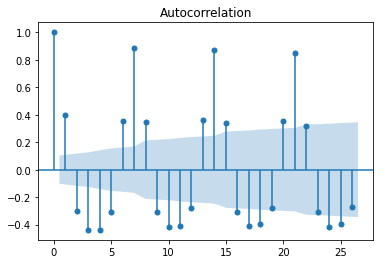

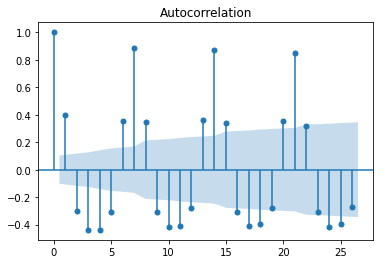

In [81]:
# plot_acf is to identify "p" value
plot_acf(birthdata)

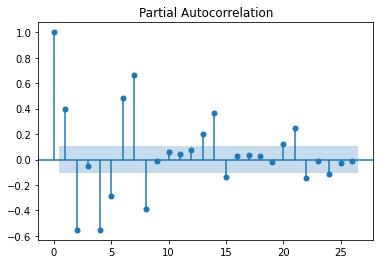

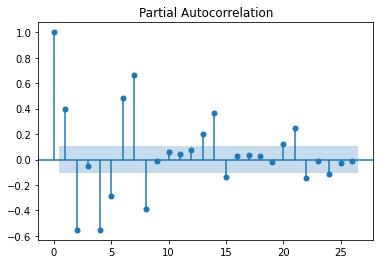

In [82]:
#to identify the value of p
plot_pacf(birthdata)

In [83]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
birthdata_train = birthdata[0:300]
birthdata_test = birthdata[300:]

In [85]:
birthdata_train

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892
...,...
2015-10-23,11942
2015-10-24,8239
2015-10-25,7288


In [86]:
birthdata_test

,births
date,
2015-10-28,12266
2015-10-29,11950
2015-10-30,11529
2015-10-31,8049
2015-11-01,7731
...,...
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458


In [87]:
birth_model = ARIMA(birthdata_train, order=(5, 1, 2))

c:\users\amilah.axienta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\amilah.axienta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Valu

In [88]:
birth_model_fit = birth_model.fit()

c:\users\amilah.axienta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [89]:
birth_model_fit.aic

4817.376106329035

In [90]:
birthdata_forecast = birth_model_fit.forecast(steps=65)[0]

In [91]:
birthdata_forecast

array([11631.3106789 , 12532.86902883, 11961.34595198,  7993.28923151,
        7916.20551869, 11463.05456617, 12512.79288693, 11766.04882611,
       12671.81955028, 11666.05268052,  8225.47197877,  8123.68283513,
       11313.63022202, 12367.56447261, 12012.20762469, 12678.4875303 ,
       11509.69649932,  8379.51050694,  8339.57470661, 11154.73246759,
       12279.7215451 , 12197.40688024, 12692.59299306, 11381.28861701,
        8532.44845528,  8514.07170301, 11026.52147726, 12209.94418014,
       12352.84392435, 12698.46400536, 11287.71102559,  8673.89164645,
        8662.01639464, 10919.59601273, 12157.86967462, 12480.39182277,
       12701.0245353 , 11220.93616386,  8805.84993197,  8787.7904528 ,
       10831.84012744, 12118.95700094, 12585.06021412, 12701.59419407,
       11176.21989143,  8928.77688163,  8896.00487869, 10760.51562748,
       12090.22846635, 12670.61762292, 12701.4209272 , 11149.37921219,
        9043.42998602,  8990.2378889 , 10703.33365759, 12069.27501186,
      

In [92]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [93]:
birthdata_forecast_error = mean_squared_error(birthdata_test , birthdata_forecast)
birthdata_forecast_error = np.sqrt(birthdata_forecast_error)

In [94]:
birthdata_forecast_error

1372.7885908989927